In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the data
df = pd.read_csv('/content/drive/MyDrive/Codes/ML Internship/Stock_price_time_Series/RELIANCE.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df[['Close']].dropna()
df.head()

,Close
Date,
2000-01-03,251.70
2000-01-04,271.85
2000-01-05,282.50
2000-01-06,294.35
2000-01-07,314.55


# New section

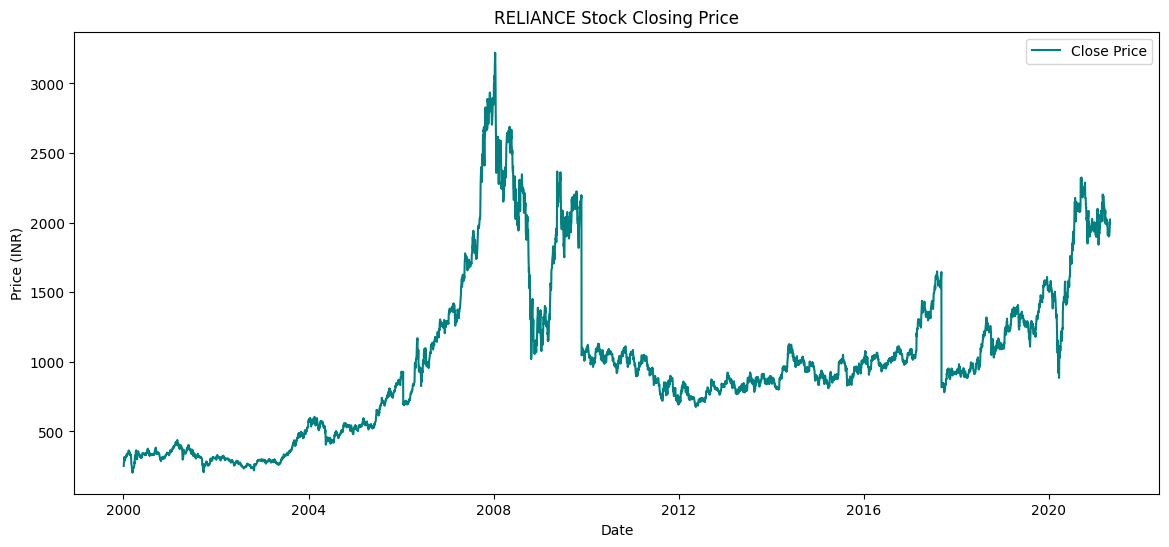

In [7]:
# Plot the closing price
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Close Price', color='teal')
plt.title('RELIANCE Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()

In [8]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))

# Create sequences
X, y = [], []
sequence_length = 60
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))

In [9]:
# Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=5, batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step - loss: 0.0117
Epoch 2/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 17s 61ms/step - loss: 5.8942e-04
Epoch 3/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 77ms/step - loss: 4.2567e-04
Epoch 4/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - loss: 5.5098e-04
Epoch 5/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - loss: 3.9151e-04


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step


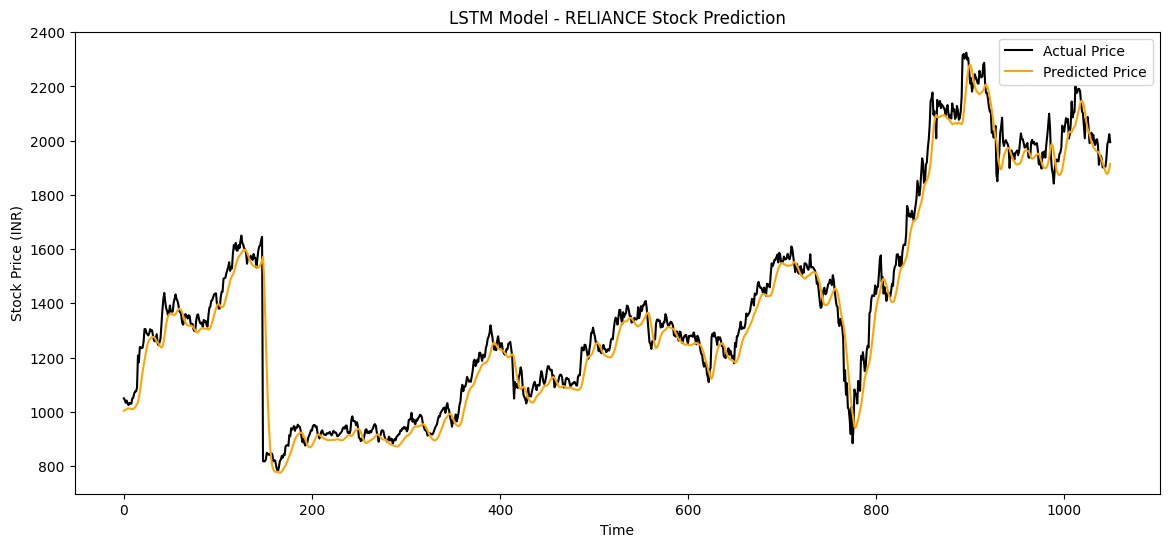

In [10]:
# Predict and inverse transform
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted.reshape(-1, 1))
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot results
plt.figure(figsize=(14,6))
plt.plot(real_prices, color='black', label='Actual Price')
plt.plot(predicted_prices, color='orange', label='Predicted Price')
plt.title('LSTM Model - RELIANCE Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price (INR)')
plt.legend()
plt.show()